In [16]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision

# Load datasets

In [5]:
train_dataset = dsets.MNIST('C:\\Users\\user\\Documents\\datasets\\mnist', 
                            train=True,  
                            transform=transforms.ToTensor(), 
                            download=True)

test_dataset = dsets.MNIST('C:\\Users\\user\\Documents\\datasets\\mnist', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=True)

In [6]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Inspect data

In [8]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

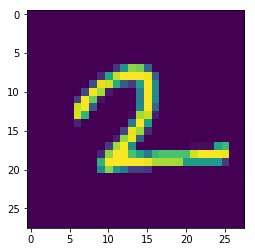

In [35]:
type(images)                    # torch.FloatTensor
npimg = image.numpy()           # (1, 28, 28)
npimg = npimg.reshape(28, 28)   # (28, 28)
plt.imshow(npimg)

# Defining the model

In [37]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [38]:
model = CNN()

# Loss and optimizer

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model

In [50]:
for epoch in range(5):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, 5, i+1, len(train_dataset)//64, loss.data[0]))

Epoch [1/5], Iter [100/937] Loss: 0.0932
Epoch [1/5], Iter [200/937] Loss: 0.1275
Epoch [1/5], Iter [300/937] Loss: 0.0293
Epoch [1/5], Iter [400/937] Loss: 0.0233
Epoch [1/5], Iter [500/937] Loss: 0.1174
Epoch [1/5], Iter [600/937] Loss: 0.0496
Epoch [1/5], Iter [700/937] Loss: 0.0210
Epoch [1/5], Iter [800/937] Loss: 0.0499
Epoch [1/5], Iter [900/937] Loss: 0.0671
Epoch [2/5], Iter [100/937] Loss: 0.0179
Epoch [2/5], Iter [200/937] Loss: 0.0317
Epoch [2/5], Iter [300/937] Loss: 0.0150
Epoch [2/5], Iter [400/937] Loss: 0.0093
Epoch [2/5], Iter [500/937] Loss: 0.0061
Epoch [2/5], Iter [600/937] Loss: 0.0469
Epoch [2/5], Iter [700/937] Loss: 0.0924
Epoch [2/5], Iter [800/937] Loss: 0.0058
Epoch [2/5], Iter [900/937] Loss: 0.1312
Epoch [3/5], Iter [100/937] Loss: 0.0099
Epoch [3/5], Iter [200/937] Loss: 0.4062
Epoch [3/5], Iter [300/937] Loss: 0.0064
Epoch [3/5], Iter [400/937] Loss: 0.0139
Epoch [3/5], Iter [500/937] Loss: 0.0867
Epoch [3/5], Iter [600/937] Loss: 0.0017
Epoch [3/5], Ite